#  EMF RBM Energy Densities

Look at different ways of computing the

- energy density
- free energy density
- entropy density

We can

- use the TAP S and MF Energy *U_naive   
    - which takes an equlibration step first  
    - S(mv, mh), U_naive(mv, mh)
- use a simple h = means_hiddens() step
    - S(v, h), E_MF(v, h)


In [29]:
import numpy as np
import h5py

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import linear_model, datasets, metrics, preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

import psutil

In [30]:
from sklearn.datasets import fetch_mldata
from sklearn.utils.validation import assert_all_finite
from scipy.sparse import csc_matrix, csr_matrix, lil_matrix
from sklearn.preprocessing import Binarizer
np.seterr(all='warn')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'warn'}

## MNIST data

http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html



In [33]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

In [35]:
Xall, y = mnist.data / 255., mnist.target
X_train, X_test = Xall[:60000], Xall[60000:]
y_train, y_test = y[:60000], y[60000:]

In [45]:
from sklearn.preprocessing import binarize
X = binarize(X_train, threshold=0.1, copy=True)

### Helper methods for simple case

In [48]:
from sklearn.utils.fixes import expit    
from sklearn.utils.extmath import safe_sparse_dot

def sig_means(x, b, W):
    a = safe_sparse_dot(x, W.T) + b
    return expit(a, out=a)

### Baseline

In [49]:
import emf_rbm

In [50]:
psutil.swap_memory()

sswap(total=0, used=0, free=0, percent=0.0, sin=0, sout=0)

### mean Entropy, Energy, and Free Energy

In [52]:
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True)
rbm= rbm.fit(X)

[EMF_RBM] Iteration 1, pseudo-likelihood = -233.51, time = 23.45s
computing TAP Free Energies
monitor:  -361.590476288 333.987235796 -26.9541948016
[EMF_RBM] Iteration 2, pseudo-likelihood = -199.81, time = 53.50s
computing TAP Free Energies
monitor:  -347.1014084 281.540042684 -64.1845633544
[EMF_RBM] Iteration 3, pseudo-likelihood = -161.95, time = 53.19s
computing TAP Free Energies
monitor:  -340.751219697 253.508561995 -84.9607242813
[EMF_RBM] Iteration 4, pseudo-likelihood = -143.83, time = 53.14s
computing TAP Free Energies
monitor:  -349.615439283 233.776341949 -112.80351918
[EMF_RBM] Iteration 5, pseudo-likelihood = -133.14, time = 53.17s
computing TAP Free Energies
monitor:  -360.027094493 218.87089056 -137.450810833
[EMF_RBM] Iteration 6, pseudo-likelihood = -121.99, time = 53.18s
computing TAP Free Energies
monitor:  -370.436213399 207.845811892 -158.268702403
[EMF_RBM] Iteration 7, pseudo-likelihood = -114.35, time = 53.06s
computing TAP Free Energies
monitor:  -380.3894112

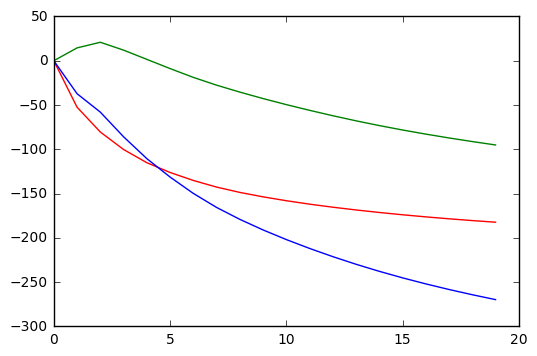

In [54]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green')

In [3]:
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 


NameError: name 'rbm' is not defined